In [11]:
# import necessary module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [83]:
# load the data
login = pd.read_json('logins.json')
login.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [84]:
print(login.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB
None


Aggregate the login counts based on 15-minute time intervals

In [85]:
# assign 1 for each login then aggregate the login count
login['login_count'] = 1
login.set_index('login_time', inplace = True)
login_15min = login.resample('15min').sum()
login_15min.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


Visualize the time series

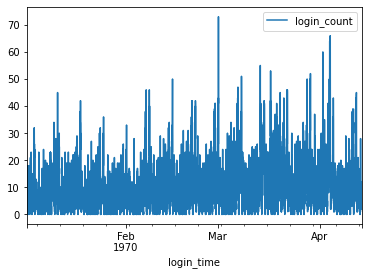

In [86]:
_=login_15min.plot()

We can see there might be periodic pattern in the weekly basis but not very clear. Let's examine further by plotting the login count for a month

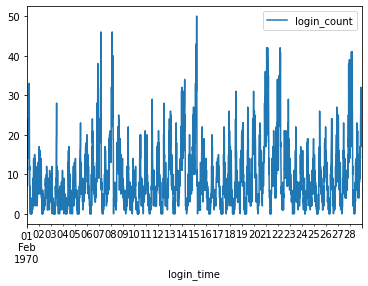

In [87]:
_=login_15min['1970-02'].plot()

Now we can see better that indeed there is a weekly recurring pattern for the login count. Let's plot the data for a week to see which days in a week give us higher login count

In [51]:
pd.Timestamp('1970-02-01').dayofweek

6

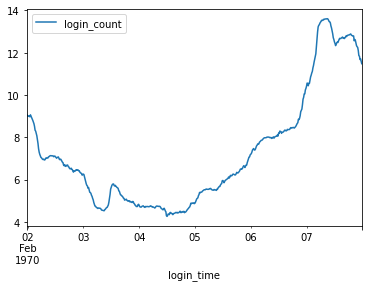

In [88]:
_=login_15min['1970-02-01':'1970-02-07'].rolling(96).mean().dropna().plot()

We can see that the login count is higher during the weekend. Let's see if there is any pattern in a single day

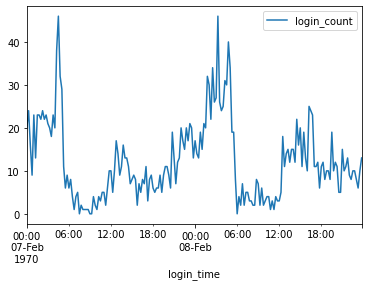

In [89]:
# plot Saturday and Sunday
_=login_15min['1970-02-07':'1970-02-08'].plot()

We can see that the login count is higher around noon time and highest around midnight. How about weekday?

<AxesSubplot:xlabel='login_time'>

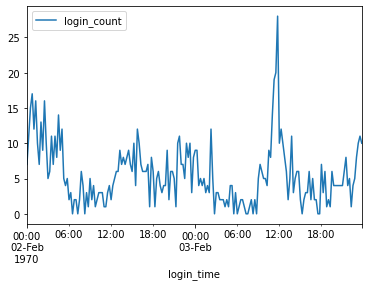

In [98]:
# plot Monday to Tuesday
_=login_15min['1970-02-02':'1970-02-03'].plot()

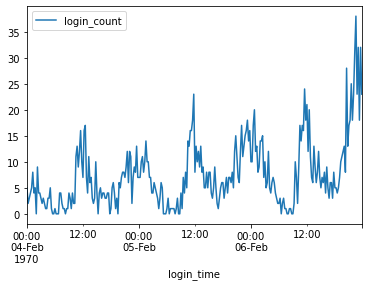

In [99]:
# Wednesday to Friday
_=login_15min['1970-02-04':'1970-02-06'].plot()

In the weekdays, the login count is also higher around noon time and the midnight.

### Part 2 - Experiment and metrics design